In [15]:
import numpy as np

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2}
    return Z2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1 - Y, np.log(1 - A2))) / m
    cost = np.squeeze(cost)
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters['W2']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = sigmoid(Z2)
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=0.01):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    dW1, db1, dW2, db2 = grads['dW1'], grads['db1'], grads['dW2'], grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        Z2, cache = forward_propagation(X, parameters)
        A2 = sigmoid(Z2)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters

def predict(parameters, X):
    Z2, _ = forward_propagation(X, parameters)
    A2 = sigmoid(Z2)
    predictions = (A2 > 0.5)
    return predictions


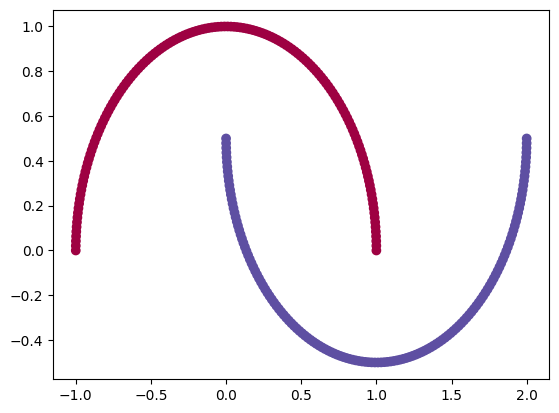

In [16]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar datos
X, Y = make_moons(n_samples=300, noise=0.00001, random_state=0)
Y = Y.reshape(1, Y.shape[0])
X = X.T

# Visualizar los datos
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
plt.show()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T


In [17]:
# Número de características de entrada
n_x = X_train.shape[0]
# Número de neuronas en la capa oculta
n_h = 4
# Número de neuronas en la capa de salida (clasificación binaria)
n_y = 1

parameters = model(X_train, Y_train, n_h, num_iterations=10000, print_cost=True)


Cost after iteration 0: 0.6931512144776166
Cost after iteration 1000: 0.6897303118318394
Cost after iteration 2000: 0.6118256024862915
Cost after iteration 3000: 0.43396429602903364
Cost after iteration 4000: 0.362078211964283
Cost after iteration 5000: 0.3306838940580294
Cost after iteration 6000: 0.3130765560354199
Cost after iteration 7000: 0.3007187645419555
Cost after iteration 8000: 0.2914126667614234
Cost after iteration 9000: 0.28405551773868987


In [18]:
# Predecir en el conjunto de prueba
predictions = predict(parameters, X_test)
print(predictions)

# Calcular la precisión
accuracy = float((np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size) * 100)
print(f"Accuracy: {accuracy}%")


[[False False  True False False False False  True False  True False False
   True False False False False False False False  True False False False
  False False False  True False False False False False  True False False
   True  True  True False  True False  True False False False  True  True
  False  True False False False  True False  True False  True False False]]
Accuracy: 91.66666666666666%
